In [32]:
import os
import cv2
import glob
import sys
import configparser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data.dataset import random_split
from torch.utils.data import DataLoader, Dataset
from torchvision import models, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import transforms, datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from PIL import Image
from tqdm import tqdm

True
DataParallel(
  (module): CNN(
    (conv1): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (conv3): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, 

Epoch 1/10: 100%|█████████████████████████████| 176/176 [01:03<00:00,  2.77it/s]


Epoch [1/10]
Train Loss: 1.9256413714452223
Val Loss: 1.5243057012557983
Accuracy: 84.98%
Precision: 93.96%
Recall: 84.98%
F1 Score: 83.30%


Epoch 2/10: 100%|█████████████████████████████| 176/176 [01:03<00:00,  2.75it/s]


Epoch [2/10]
Train Loss: 1.8584721305153586
Val Loss: 1.5323741303549872
Accuracy: 83.84%
Precision: 94.84%
Recall: 83.84%
F1 Score: 83.01%


Epoch 3/10: 100%|█████████████████████████████| 176/176 [01:03<00:00,  2.76it/s]


Epoch [3/10]
Train Loss: 1.8271670314398678
Val Loss: 1.4917229319375658
Accuracy: 87.99%
Precision: 94.49%
Recall: 87.99%
F1 Score: 86.38%


Epoch 4/10: 100%|█████████████████████████████| 176/176 [01:03<00:00,  2.75it/s]


Epoch [4/10]
Train Loss: 1.7190694917332043
Val Loss: 1.5357603932183885
Accuracy: 83.58%
Precision: 95.07%
Recall: 83.58%
F1 Score: 84.43%


Epoch 5/10: 100%|█████████████████████████████| 176/176 [01:04<00:00,  2.73it/s]


Epoch [5/10]
Train Loss: 1.6774674369530245
Val Loss: 1.5355062219831679
Accuracy: 83.62%
Precision: 95.38%
Recall: 83.62%
F1 Score: 84.70%


Epoch 6/10: 100%|█████████████████████████████| 176/176 [01:03<00:00,  2.75it/s]


Epoch [6/10]
Train Loss: 1.6618474552577192
Val Loss: 1.4890000820159912
Accuracy: 88.24%
Precision: 95.53%
Recall: 88.24%
F1 Score: 87.37%


Epoch 7/10: 100%|█████████████████████████████| 176/176 [01:03<00:00,  2.75it/s]


Epoch [7/10]
Train Loss: 1.6511481966484676
Val Loss: 1.508202077850463
Accuracy: 86.42%
Precision: 95.73%
Recall: 86.42%
F1 Score: 86.37%


Epoch 8/10: 100%|█████████████████████████████| 176/176 [01:04<00:00,  2.74it/s]


Epoch [8/10]
Train Loss: 1.6444728008725427
Val Loss: 1.5695767535103693
Accuracy: 80.16%
Precision: 95.05%
Recall: 80.16%
F1 Score: 82.14%


Epoch 9/10: 100%|█████████████████████████████| 176/176 [01:04<00:00,  2.74it/s]


Epoch [9/10]
Train Loss: 1.6408562463792888
Val Loss: 1.5252108479303026
Accuracy: 84.60%
Precision: 95.42%
Recall: 84.60%
F1 Score: 85.00%


Epoch 10/10: 100%|████████████████████████████| 176/176 [01:03<00:00,  2.75it/s]


Epoch [10/10]
Train Loss: 1.6363862556490032
Val Loss: 1.4782347168241228
Accuracy: 89.33%
Precision: 95.41%
Recall: 89.33%
F1 Score: 87.84%
모델의 최종 성능
Test Loss: 1.4808
Test Accuracy: 89.00%
Test Precision: 95.35%
Test Recall: 89.00%
Test F1 Score: 87.63%


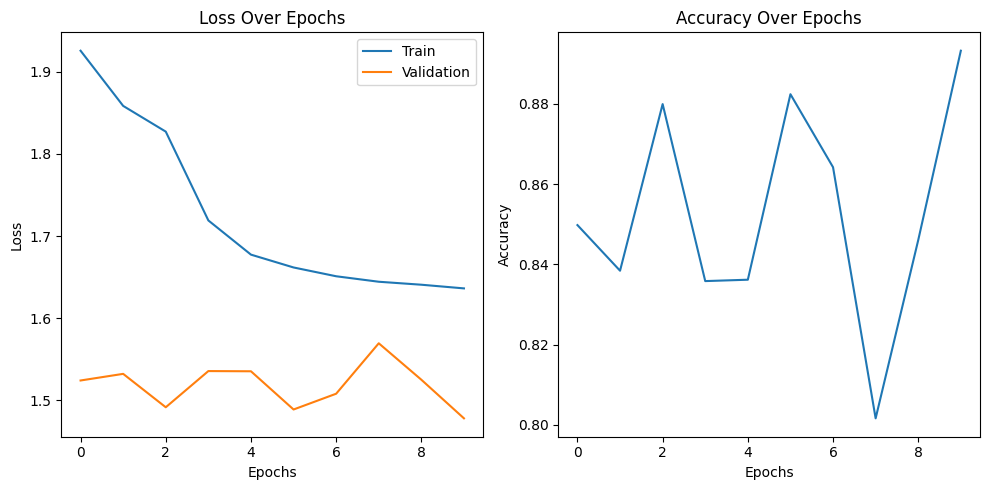

In [33]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional Layer 그룹 1
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        # Convolutional Layer 그룹 2
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        # Convolutional Layer 그룹 3
        self.conv5 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv6 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        # Convolutional Layer 그룹 4
        self.conv7 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv8 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        # Spatial Dropout
        self.dropout = nn.Dropout2d(p=0.2)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.flatten = nn.Flatten()
        # self.flatten = nn.Linear(128*6*6, 4608)
        self.dropout2 = nn.Dropout(0.2)
        self.dense1 = nn.Linear(4608, 1280)
        # 출력층 크기를 9
        self.out = nn.Linear(1280, 9)

    def forward(self, x):
        # Conv-Pool-Conv 그룹 1
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)

        # Conv-Pool-Conv 그룹 2
        x = self.conv3(x)
        x = self.pool2(x)
        x = self.conv4(x)

        # Conv-Pool-Conv 그룹 3
        x = self.conv5(x)
        x = self.pool3(x)
        x = self.conv6(x)

        # Conv-Pool-Conv 그룹 4
        x = self.conv7(x)
        x = self.pool4(x)
        x = self.conv8(x)

        # Spatial Dropout
        x = self.dropout(x)
        x = self.pool5(x)

        # Fully Connected Layers
        x = F.relu(self.flatten(x))
        x = self.dropout2(x)
        x = F.relu(self.dense1(x))
        # Softmax 출력층
        x = nn.Softmax(dim=1)(self.out(x))

        return x


# # 모델 인스턴스 생성
# model = CNN()
#
# # Adam 최적화 사용
# optimizer = torch.optim.Adam(model.parameters())

# 배치 크기와 에포크(epoch) 수
batch_size = 512
epochs = 10

learning_rate = 0.001

# 데이터 전처리 및 로딩
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),         # 텐서로 변환
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

# 데이터셋 생성
train_data = ImageFolder(root = "./augmented_images/train", 
                   transform = transform)
val_data = ImageFolder(root = "./augmented_images/val", 
                   transform = transform)
test_data = ImageFolder(root = "./augmented_images/test", 
                   transform = transform)
# dataset = datasets.ImageFolder(root=output_folder, transform=transform)

# class_samples = {}

# for i in range(len(train_data)):
#     _, label = train_data[i]
#     if label not in class_samples:
#         class_samples[label] = []
#     class_samples[label].append(i)

# # 클래스 간의 샘플 수가 동일하도록 분할
# train_samples = []
# val_samples = []
# test_samples = []
# for label, samples in class_samples.items():
#     n_samples = len(samples)
#     n_train = int(0.65 * n_samples)
#     n_val = int(0.2 * n_samples)
#     n_test = n_samples - n_train - n_val

#     # 클래스 별로 분할된 샘플 추가
#     train_samples.extend(samples[:n_train])
#     val_samples.extend(samples[n_train:n_train + n_val])
#     test_samples.extend(samples[n_train + n_val:])

# # 분할된 샘플 인덱스를 사용하여 데이터셋 분할
# train_dataset = Subset(dataset, train_samples)
# val_dataset = Subset(dataset, val_samples)
# test_dataset = Subset(dataset, test_samples)



# 분할된 데이터셋을 데이터 로더로 변환합니다.
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

# GPU 사용 가능 여부 확인
device = torch.device("cuda")

# 모델 인스턴스 생성
CNN_model = CNN().to(device)
CNN_model = nn.DataParallel(CNN_model)

print(torch.cuda.is_available())

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(CNN_model.parameters(), lr=learning_rate)

print(CNN_model)

# 손실 함수 및 정확도 기록
train_losses = []
val_losses = []
accuracies = []

patience = 3  # 허용횟수
early_stopping_counter = 0  # 얼리스탑 카운터
best_val_loss = 999.999 # 최고 검증 손실값

# 학습
for epoch in range(epochs):
    CNN_model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = CNN_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 테스트
    CNN_model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # 입력 데이터를 GPU로 이동
            outputs = CNN_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    # 손실 함수 및 정확도 평균 계산
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    accuracies.append(correct / total)
    # 정확도 계산
    accuracy = accuracy_score(y_true, y_pred)
    # 정밀도 계산
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    # 재현율 계산
    recall = recall_score(y_true, y_pred, average='weighted')
    # f1 스코어 계산
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Epoch [{epoch + 1}/{epochs}]")
    print(f"Train Loss: {running_loss / len(train_loader)}")
    print(f"Val Loss: {val_loss / len(val_loader)}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

    # epoch이 절반 이상 진행됐을 때
    if epoch > epochs / 2:
        # early stop 조건 확인
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0  # 얼리스탑 카운터 초기화
        else:
            early_stopping_counter += 1

        # early stop 허용 횟수를 초과하면 학습 중단
        if early_stopping_counter >= patience:
            print("Early stopping triggered!")
            break

# 모델의 최종 성능 평가
CNN_model.eval()
test_loss = 0.0
correct = 0
total = 0
y_true_test = []
y_pred_test = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = CNN_model(images)
        test_loss += criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # for i in range(len(images)):
        #     print(f"예측결과: {predicted[i]}, 정답: {labels[i]}")

# 평가 지표 계산
test_accuracy = accuracy_score(y_true_test, y_pred_test)
test_precision = precision_score(y_true_test, y_pred_test, average='weighted', zero_division=1)
test_recall = recall_score(y_true_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_true_test, y_pred_test, average='weighted')
print("모델의 최종 성능")

# 평가 결과 출력
print("Test Loss: {:.4f}".format(test_loss / len(test_loader)))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Precision: {:.2f}%".format(test_precision * 100))
print("Test Recall: {:.2f}%".format(test_recall * 100))
print("Test F1 Score: {:.2f}%".format(test_f1 * 100))
# 그래프 그리기
plt.figure(figsize=(10, 5))

# 손실 함수 그래프
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [45]:
model_name = "effinet_v2.pth"
batch_size = 128
num_epochs = 3

In [46]:
mean_ = [0.485, 0.456, 0.406]
std_ = [0.229, 0.224, 0.225]

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=list(mean_), std=list(std_)),
])

In [47]:
# DataLoader 설정
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [48]:
model = models.efficientnet_v2_s(weights="DEFAULT")

model.classifier[1] = CNN_model.module.out

In [49]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [50]:
# model = models.efficientnet_v2_s(weights="DEFAULT")

# model.classifier[1] = nn.Linear(model.classifier[1].in_features, 9)

In [51]:
model.to(device)

model = nn.DataParallel(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 1.0 if epoch < 10 else np.math.exp(0.08 * (10 - epoch)))

In [52]:
def train_and_validate_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=25):
    best_acc = 0.0
    train_score = []
    val_score = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        with tqdm(train_loader, ncols=160, ascii=" =", unit="batch") as tepoch:
            for inputs, labels in tepoch:
                tepoch.set_description(f"Epoch {epoch + 1}")

                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == labels.data)

                tepoch.set_postfix(loss=loss.item())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_score.append((epoch_loss, epoch_acc.to("cpu").numpy()))
        scheduler.step()

        # 검증 단계
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            with torch.no_grad():
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        val_score.append((val_loss, val_acc.to("cpu").numpy()))

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # 모델 저장 조건 추가: 현재 검증 정확도가 지금까지의 최고보다 더 높으면 모델 저장
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), model_name)

    return model, train_score, val_score

In [53]:
model, train_score, val_score = train_and_validate_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=num_epochs)

Epoch 1: 100%|================================================================================================| 704/704 [05:48<00:00,  2.02batch/s, loss=0.0488]


Epoch 1/3, Train Loss: 0.2208, Train Acc: 0.9246, Val Loss: 0.1867, Val Acc: 0.9356


Epoch 2: 100%|=================================================================================================| 704/704 [05:48<00:00,  2.02batch/s, loss=0.553]


Epoch 2/3, Train Loss: 0.1069, Train Acc: 0.9636, Val Loss: 0.1110, Val Acc: 0.9650


Epoch 3: 100%|================================================================================================| 704/704 [05:48<00:00,  2.02batch/s, loss=0.0205]


Epoch 3/3, Train Loss: 0.0805, Train Acc: 0.9724, Val Loss: 0.0862, Val Acc: 0.9741


In [54]:
train_loss, train_acc = zip(*train_score)
val_loss, val_acc = zip(*val_score)

/tmp/ipykernel_29984/525166825.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


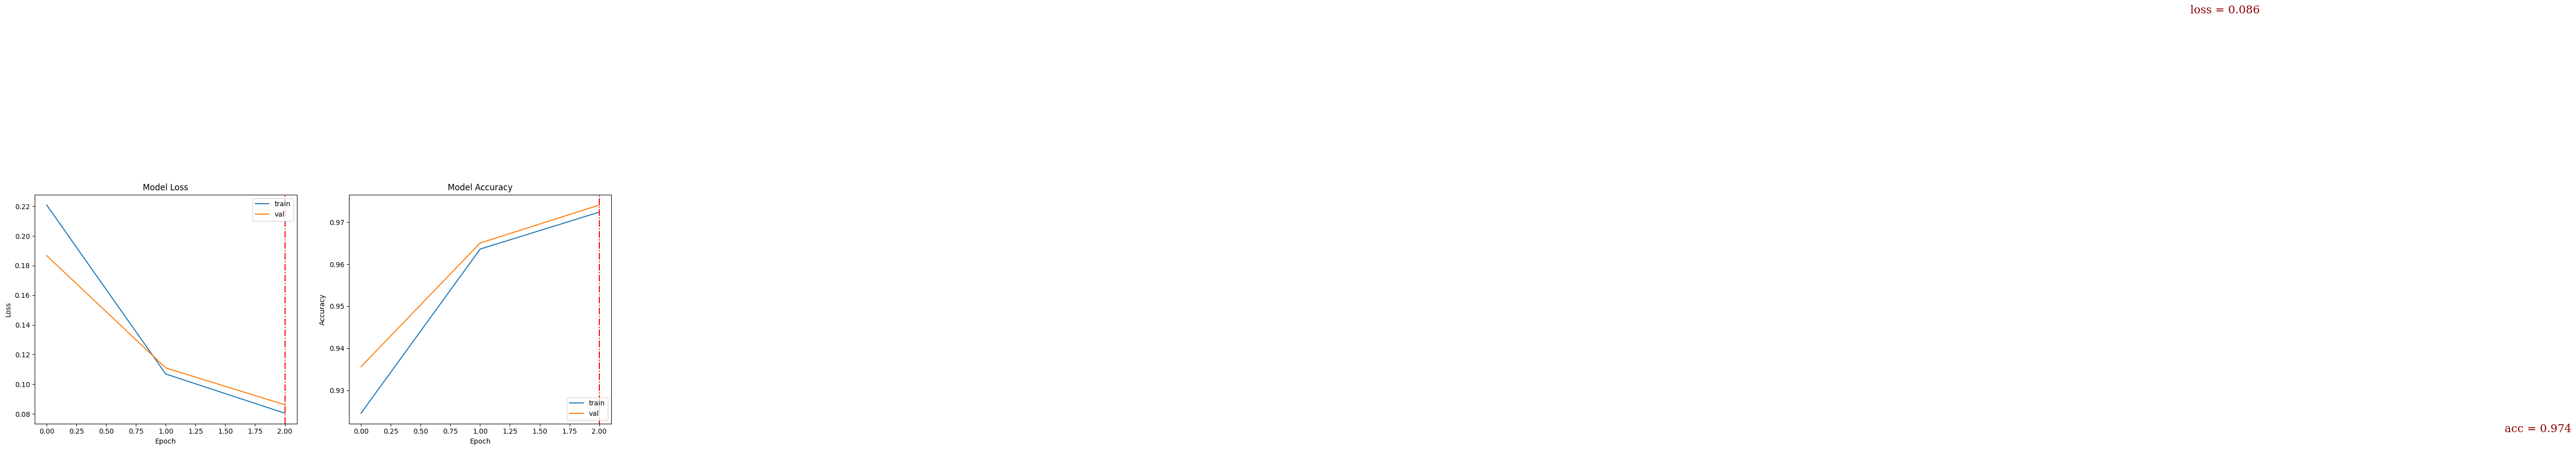

In [55]:
plt.figure(figsize=(15,6))
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}

# 훈련 손실 그래프
plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.axvline(np.argmax(val_acc), color="r", linestyle="dashdot")
plt.text(18.0, 0.35, f"loss = {np.round(np.min(val_loss), 3)}", fontdict=font1)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.axvline(np.argmax(val_acc), color="r", linestyle="dashdot")
plt.text(18.0, 0.92, f"acc = {np.round(np.max(val_acc), 3)}", fontdict=font1)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.tight_layout()
plt.show()

In [56]:
test_dataset = datasets.ImageFolder("./augmented_images/test", transform=transform_train)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(tuple(test_dataset.class_to_idx.keys()))

('Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'none')


In [57]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in tuple(test_dataset.class_to_idx.keys())}
total_pred = {classname: 0 for classname in tuple(test_dataset.class_to_idx.keys())}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[tuple(test_dataset.class_to_idx.keys())[label]] += 1
            total_pred[tuple(test_dataset.class_to_idx.keys())[label]] += 1

# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Center is 94.0 %
Accuracy for class: Donut is 96.7 %
Accuracy for class: Edge-Loc is 81.0 %
Accuracy for class: Edge-Ring is 99.6 %
Accuracy for class: Loc   is 76.9 %
Accuracy for class: Near-full is 100.0 %
Accuracy for class: Random is 94.4 %
Accuracy for class: Scratch is 79.0 %
Accuracy for class: none  is 97.4 %


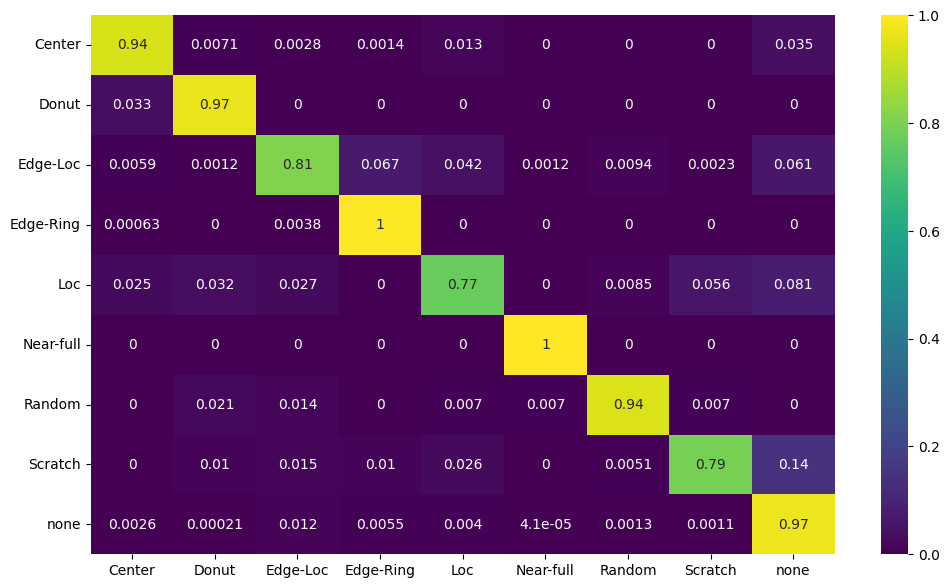

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
with torch.no_grad():
    for inputs, labels in test_loader:
            output = model(inputs) # Feed Network
    
            output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
            y_pred.extend(output) # Save Prediction
            
            labels = labels.data.cpu().numpy()
            y_true.extend(labels) # Save Truth

# constant for classes
classes = tuple(test_dataset.class_to_idx.keys())

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, cmap = 'viridis')
plt.savefig('output.png')

In [59]:
# 모델의 최종 성능 평가
model.eval()
test_loss = 0.0
correct = 0
total = 0
y_true_test = []
y_pred_test = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_loss += criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # for i in range(len(images)):
        #     print(f"예측결과: {predicted[i]}, 정답: {labels[i]}")

# 평가 지표 계산
test_accuracy = accuracy_score(y_true_test, y_pred_test)
test_precision = precision_score(y_true_test, y_pred_test, average='weighted', zero_division=1)
test_recall = recall_score(y_true_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_true_test, y_pred_test, average='weighted')
print("모델의 최종 성능")

# 평가 결과 출력
print("Test Loss: {:.4f}".format(test_loss / len(test_loader)))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Precision: {:.2f}%".format(test_precision * 100))
print("Test Recall: {:.2f}%".format(test_recall * 100))
print("Test F1 Score: {:.2f}%".format(test_f1 * 100))

모델의 최종 성능
Test Loss: 0.1184
Test Accuracy: 96.35%
Test Precision: 96.69%
Test Recall: 96.35%
Test F1 Score: 96.46%
